# CREDIT CARD FRAUD DETECTION

In [29]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load and Explore Data

In [30]:
df_train=pd.read_csv("C:/Users/sujal/Downloads/Credit Card Fraud Detection/fraudTrain.csv",header=0)
df_test=pd.read_csv("C:/Users/sujal/Downloads/Credit Card Fraud Detection/fraudTest.csv",header=0)

In [31]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [32]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [33]:
df_train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [34]:
df_train.shape

(1296675, 23)

In [35]:
df_test.shape

(555719, 23)

In [36]:
df_train.size

29823525

In [37]:
df_test.size

12781537

In [38]:
df_train.info

<bound method DataFrame.info of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutman

In [39]:
df_test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care 

In [40]:
df_train.describe

<bound method NDFrame.describe of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutm

In [41]:
df_test.describe

<bound method NDFrame.describe of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_car

In [42]:
df_train.isnull().values.any()

False

In [43]:
df_test.isnull().values.any()

False

In [44]:
df_train.count()

Unnamed: 0               1296675
trans_date_trans_time    1296675
cc_num                   1296675
merchant                 1296675
category                 1296675
amt                      1296675
first                    1296675
last                     1296675
gender                   1296675
street                   1296675
city                     1296675
state                    1296675
zip                      1296675
lat                      1296675
long                     1296675
city_pop                 1296675
job                      1296675
dob                      1296675
trans_num                1296675
unix_time                1296675
merch_lat                1296675
merch_long               1296675
is_fraud                 1296675
dtype: int64

In [45]:
df_test.count()

Unnamed: 0               555719
trans_date_trans_time    555719
cc_num                   555719
merchant                 555719
category                 555719
amt                      555719
first                    555719
last                     555719
gender                   555719
street                   555719
city                     555719
state                    555719
zip                      555719
lat                      555719
long                     555719
city_pop                 555719
job                      555719
dob                      555719
trans_num                555719
unix_time                555719
merch_lat                555719
merch_long               555719
is_fraud                 555719
dtype: int64

In [46]:
df_combined=pd.concat([df_test,df_train],axis=0)

In [47]:
df_combined.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [48]:
df_combined.shape

(1852394, 23)

In [49]:
df_combined.size

42605062

In [50]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               

In [51]:
df_combined.drop(labels=["first","last","job","dob","trans_num","street","trans_date_trans_time","city","state"],axis=1,inplace=True)

# Data Visualization and Preprocessing

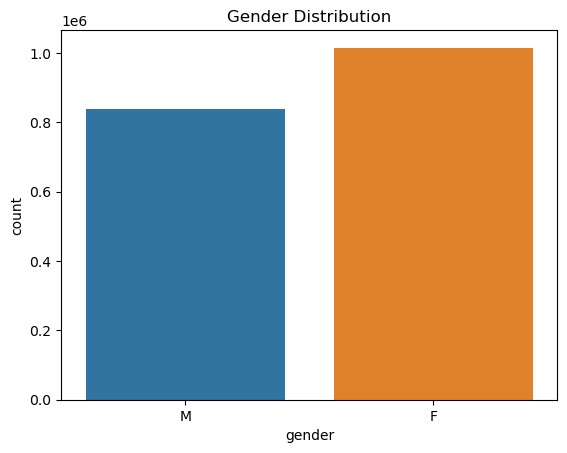

In [52]:
sns.countplot(x='gender',data=df_combined)
plt.title("Gender Distribution")
plt.show()

In [53]:
encoder=LabelEncoder()
new_col=encoder.fit_transform(df_combined["merchant"].values)
df_combined['merchant_new']=new_col
df_combined.drop(labels=["merchant"],axis=1,inplace=True)

In [54]:
encoder=LabelEncoder()
new_col1=encoder.fit_transform(df_combined["category"].values)
df_combined["category_new"]=new_col1
df_combined.drop(labels=["category"],axis=1,inplace=True)

In [55]:
df_combined=pd.get_dummies(df_combined)
df_combined.drop(labels=['gender_F'],axis=1,inplace=True)

In [56]:
df_combined.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merchant_new,category_new,gender_M
0,0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,319,10,True
1,1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,591,10,False
2,2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,611,5,False
3,3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,222,9,True
4,4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,292,13,True


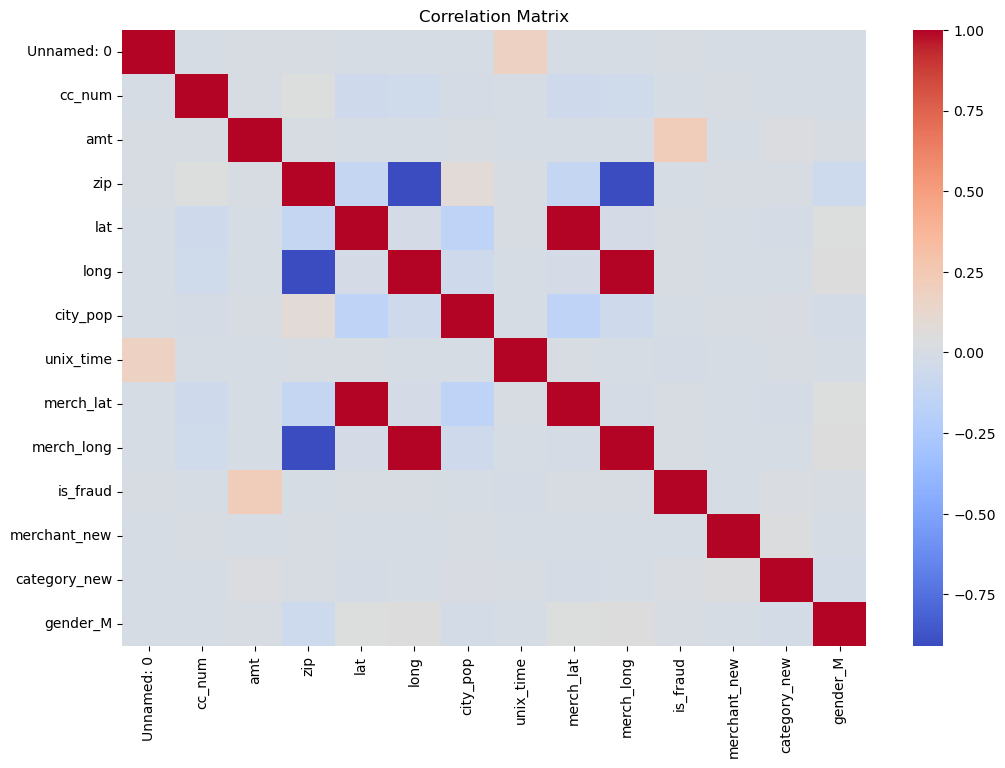

In [57]:
correlation_matrix= df_combined.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,cmap='coolwarm',annot=False,fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [60]:
X=df_combined.drop('is_fraud',axis=1)
y=df_combined["is_fraud"]

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
Scaler=StandardScaler() 
X_train=Scaler.fit_transform(X_train) 
X_test=Scaler.transform(X_test)

# Train Logistic Regression Model

In [63]:
lr_model=LogisticRegression()

In [64]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [65]:
lr_prediction=lr_model.predict(X_test)

In [66]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test,lr_prediction))
print(classification_report(y_test,lr_prediction))
print("Accuracy",accuracy_score(y_test,lr_prediction))

Logistic Regression Model:
[[368405    177]
 [  1897      0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368582
           1       0.00      0.00      0.00      1897

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

Accuracy 0.9944018419397591


# Train Decision Tree Model

In [67]:
dt_model=DecisionTreeClassifier()

In [68]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
dt_prediction=dt_model.predict(X_test)

In [70]:
print("Decision Tree Model:")
print(confusion_matrix(y_test,dt_prediction))
print(classification_report(y_test,dt_prediction))
print("Accuracy:",accuracy_score(y_test,dt_prediction))

Decision Tree Model:
[[367824    758]
 [   646   1251]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368582
           1       0.62      0.66      0.64      1897

    accuracy                           1.00    370479
   macro avg       0.81      0.83      0.82    370479
weighted avg       1.00      1.00      1.00    370479

Accuracy: 0.9962103115156324


# Train Random Forest Model

In [71]:
rf_model=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [72]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [73]:
rf_prediction=rf_model.predict(X_test)

In [74]:
print("Random Forest Model:")
print(confusion_matrix(y_test,rf_prediction))
print(classification_report(y_test,rf_prediction))
print("Accuracy:",(y_test,rf_prediction))

Random Forest Model:
[[368405    177]
 [   655   1242]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368582
           1       0.88      0.65      0.75      1897

    accuracy                           1.00    370479
   macro avg       0.94      0.83      0.87    370479
weighted avg       1.00      1.00      1.00    370479

Accuracy: (985425     0
1175862    0
354659     0
938069     0
468148     0
          ..
297820     0
837075     0
1026796    0
1250051    0
218794     0
Name: is_fraud, Length: 370479, dtype: int64, array([0, 0, 0, ..., 0, 0, 0], dtype=int64))
